# CA

In [1]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plot
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2 as cv
import sys
import os



def preprocess(_x_train, _y_train, _x_test, _y_test):
    
       
    # normalize to between 0 and 1 reduce search space
    x_train = _x_train / 255
    x_test = _x_test / 255

    le=LabelEncoder()
    le.fit(_y_train)
    y_train=le.transform(_y_train)
    le.fit(_y_test)
    y_test=le.transform(_y_test)
    
    # convert 1 dimensional array to 4-dimensional array
    # each row in y_train and y_test is one-hot encoded
    y_train = tf.keras.utils.to_categorical(y_train, 4)
    y_test = tf.keras.utils.to_categorical(y_test, 4)

    return (x_train, y_train, x_test, y_test)




def run_cnn(x_train, y_train, x_test, y_test):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(filters = 30,kernel_size = (3,3),
                                     activation= 'tanh',input_shape=(150,150,3)))
    model.add(tf.keras.layers.Conv2D(filters = 30,kernel_size = (3,3)
                                     ,activation = 'tanh'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))
    model.add(tf.keras.layers.Conv2D(filters = 30, kernel_size =(3,3),
                                     activation ='tanh'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size =(3,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))
    model.add(tf.keras.layers.Conv2D(filters = 30, kernel_size =(3,3),
                                     activation ='tanh'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(20,activation ='relu'))
    model.add(tf.keras.layers.Dense(15, activation ='relu'))
    model.add(tf.keras.layers.Dense(4, activation ='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    training_model=model.fit(x_train, y_train,batch_size = 50, epochs=30)
    loss,accuracy = model.evaluate(x_test,y_test, verbose = 1)
    print("loss=", loss)
    print("accuracy=", accuracy)
    

fruit_training_data = pd.read_csv('Fruit_train.csv')
fruit_testing_data = pd.read_csv('Fruit_Test.csv')

df_train = pd.DataFrame(fruit_training_data,columns=['Image_Path','Name'])
df_test = pd.DataFrame(fruit_testing_data,columns=['Image_Path','Name'])

img_array=[]
img_array1=[]
shape = (150,150)

for i in range(len(df_train)):
        image = df_train.loc[i, "Image_Path"]
        img = cv.imread(image)
        img=cv.resize(img, shape)
        img_array.append(img)
    
for j in range(len(df_test)):
        image1 = df_test.loc[j, "Image_Path"]
        img1 = cv.imread(image1)
        img1=cv.resize(img1, shape)
        img_array1.append(img1)
              
img_array=np.array(img_array)
img_array1=np.array(img_array1)
print("Loading fruit data into memory...")

_x_train = img_array 
_y_train = df_train.iloc[:, -1] 
_x_test = img_array1 
_y_test = df_test.iloc[:, -1] 

(x_train, y_train, x_test, y_test) = preprocess(_x_train, _y_train, _x_test, _y_test)

model = run_cnn(x_train, y_train, x_test, y_test)

Loading fruit data into memory...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 30)      840       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 30)      8130      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 30)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)     

# IRIS_NN

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


dataset = pd.read_csv('iris.csv')

# .values to change to NumPy array
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size=0.05, stratify=y)

# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

# dimension reduction
# pca = PCA(n_components=2)
# pca.fit(x_train)
# x_train = pca.transform(x_train)
# x_test = pca.transform(x_test)

le = LabelEncoder()
le.fit(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

# build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200, input_shape=(x_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# run the model
model.fit(x_train, y_train, epochs=100, verbose=1)

# perform auto-evaluation
results = model.evaluate(x_test, y_test, verbose=1)
print('results = ', results, '\n')

# perform manual-evaluation
predictions = model.predict(x_test)
for i in np.arange(len(predictions)):
	print('Actual: ', y_test[i], 'Predicted: ', predictions[i])



Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 0.9666 - accuracy: 0.6690
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8660 - accuracy: 0.7254
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7863 - accuracy: 0.9366
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7226 - accuracy: 0.7817
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.7113
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.6901
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.6831
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7817
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.9366
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.8803
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9718
Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9789
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9718
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9789
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9789
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9789
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9789
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1003 - accuracy: 0.9789
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9718
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9789
Epoch 94/100
5/5 [===============

# IRIS NN WITH PCA

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


dataset = pd.read_csv('iris.csv')

# .values to change to NumPy array
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size=0.05, stratify=y)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#dimension reduction
pca = PCA(n_components=2)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

le = LabelEncoder()
le.fit(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

# build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200, input_shape=(x_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# run the model
model.fit(x_train, y_train, epochs=100, verbose=1)

# perform auto-evaluation
results = model.evaluate(x_test, y_test, verbose=1)
print('results = ', results, '\n')

# perform manual-evaluation
predictions = model.predict(x_test)
for i in np.arange(len(predictions)):
	print('Actual: ', y_test[i], 'Predicted: ', predictions[i])



Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0668 - accuracy: 0.3451
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.9425 - accuracy: 0.7606
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.8327 - accuracy: 0.8028
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7414 - accuracy: 0.8310
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.8310
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.8239
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.8380
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.8380
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.8380
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4627 - accuracy: 0.8451
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9155
Epoch 85/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1753 - accuracy: 0.9155
Epoch 86/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.9155
Epoch 87/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1745 - accuracy: 0.9155
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1750 - accuracy: 0.9155
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.9155
Epoch 90/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1731 - accuracy: 0.9155
Epoch 91/100
5/5 [==============================] - 0s 1000us/step - loss: 0.1724 - accuracy: 0.9155
Epoch 92/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.9155
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.9155
Epoch 94/100
5/5 [============

# WINE PCA CNN

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


dataset = pd.read_csv('wine.csv')

# .values to change to NumPy array
x = dataset.iloc[:, 1:].values
y = dataset.iloc[:,0].values

x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size=0.1, stratify=y)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# dimension reduction
pca = PCA(n_components=5)
pca.fit(x_train)
print('explained variance: ', pca.explained_variance_ratio_)
print('explained variance: ', pca.explained_variance_ratio_.sum())

# use the same distribution as the fitted data
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

le = LabelEncoder()
le.fit(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

# build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200, input_shape=(x_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# run the model
model.fit(x_train, y_train, epochs=100, verbose=1)

# perform auto-evaluation
results = model.evaluate(x_test, y_test, verbose=1)
print('results = ', results, '\n')

# perform manual-evaluation
predictions = model.predict(x_test)
for i in np.arange(len(predictions)):
	print('Actual: ', y_test[i], 'Predicted: ', predictions[i])



explained variance:  [0.36143734 0.19199713 0.10859257 0.07287653 0.06875854]
explained variance:  0.803662108968878
Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 1.1689 - accuracy: 0.2125
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.9747 - accuracy: 0.7188
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.8114 - accuracy: 0.8813
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.9375
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5633 - accuracy: 0.9563
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.9625
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.9625
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.9625
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.9750
Epoch 10/1

5/5 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 84/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 93/100
5/5 [===============

# MNIST PROF

Loading MNIST data into memory...
(60000, 28, 28)
(60000, 28, 28, 1)
float64
(60000,)
(10000,)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit :


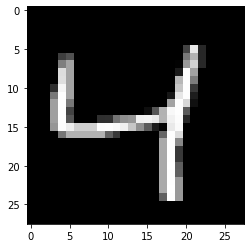

Epoch 1/2
938/938 [==============================] - 40s 43ms/step - loss: 0.2280 - accuracy: 0.9309
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.0441 - accuracy: 0.9846
loss= 0.04408702254295349
accuracy= 0.9846000075340271


In [6]:
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plot

# np.set_printoptions(threshold=sys.maxsize)
np.random.seed(123)

def render_digit(data):
	# note that matplotlib wants the format 
	# to be (width, height, number_of_channels)
	plot.imshow(data, cmap='gray')
	plot.show()


def preprocess(_x_train, _y_train, _x_test, _y_test):
	print(_x_train.shape)

	# establish the depth of our images; here we have
	# grayscale images, so the depth is 1. for color
	# images, the depth is 3.
	x_train = np.reshape(_x_train, (_x_train.shape[0], 28, 28, 1))
	x_test = np.reshape(_x_test, (_x_test.shape[0], 28, 28, 1))
    

	# normalize to between 0 and 1 reduce search space
	x_train = x_train / 255
	x_test = x_test / 255



	# convert 1 dimensional array to 10-dimensional array
	# each row in y_train and y_test is one-hot encoded
	y_train = tf.keras.utils.to_categorical(_y_train, 10)
	y_test = tf.keras.utils.to_categorical(_y_test, 10)
    
	print(x_train.shape)
	print(x_train.dtype)
	print(_y_train.shape)
	print(_y_test.shape)

	# print to examine our one-hot encoding
	print(y_train[0:10])
	print(y_train.shape)
	for i in range(10):
		print(y_train[i])

	return (x_train, y_train, x_test, y_test)


def run_cnn(_x_train, _y_train, _x_test, _y_test):
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(28, 28, 1)))
	model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu'))
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
	model.add(tf.keras.layers.Dropout(0.25))
	model.add(tf.keras.layers.Flatten())
	model.add(tf.keras.layers.Dense(128, activation='relu'))
	model.add(tf.keras.layers.Dropout(0.5))
	model.add(tf.keras.layers.Dense(10, activation='softmax'))
	model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

	model.fit(_x_train, _y_train,batch_size=64, epochs=2)


	loss,accuracy = model.evaluate(_x_test, _y_test)
	print("loss=", loss)
	print("accuracy=", accuracy)


print("Loading MNIST data into memory...")
(_x_train, _y_train), (_x_test, _y_test) = tf.keras.datasets.mnist.load_data() 

(x_train, y_train, x_test, y_test) = preprocess(_x_train, _y_train, _x_test, _y_test)

print('Digit :')
render_digit(_x_train[2])
model = run_cnn(x_train, y_train, x_test, y_test)



# BANKNOTES 

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split

# ".values" to change from panda's dataframe 
# data structure to numpy's array
data = pd.read_csv('banknotes.csv').values

# get 70% as training data, 30% as test data
# len(x_train) must match len(y_train)
# y_train are the "labels/classes" for x_train
x_train, x_test, y_train, y_test = train_test_split(
	data[:,1:-1], data[:,-1:], test_size=0.3)

# convert from python's list to numpy's array
# tensorflow library expecting numpy's array
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# one-hot encode the single digit labels of
# y_train and y_test 
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

# create neural network 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=80, 
	input_shape=(x_train.shape[1],), activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=50, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
	metrics=['accuracy'])
model.fit(x_train, y_train, epochs=200)

# use our test data to evaluate the accuracy of our classifier
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(loss, accuracy)





Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.5357
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5500
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.4643
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5143
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5357
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5357
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5357
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.5357
Epoch 9/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.5357
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.5357
Epoch 11/200
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9286
Epoch 85/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9643
Epoch 86/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9643
Epoch 87/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9429
Epoch 88/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2164 - accuracy: 0.9571
Epoch 89/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9714
Epoch 90/200
5/5 [==============================] - 0s 2ms/step - loss: 0.2193 - accuracy: 0.9500
Epoch 91/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9857
Epoch 92/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9643
Epoch 93/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1916 - accuracy: 0.9714
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9643
Epoch 168/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9429
Epoch 169/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9857
Epoch 170/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9786
Epoch 171/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9786
Epoch 172/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.9929
Epoch 173/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9714
Epoch 174/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 1.0000
Epoch 175/200
5/5 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9643
Epoch 176/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0775 - accuracy: 0.9929
Epoch 177/200
5/5 [=====